In [840]:
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [841]:
df.drop(columns=['pc','pcc', 'ba', 'sc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], inplace=True)
df.head()

,id,age,bp,sg,al,su,rbc,bgr,bu,sod,pot,hemo,pcv,wc,rc,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,121.0,36.0,NaN,NaN,15.4,44,7800,5.2,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,NaN,18.0,NaN,NaN,11.3,38,6000,NaN,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,423.0,53.0,NaN,NaN,9.6,31,7500,NaN,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,117.0,56.0,111.0,2.5,11.2,32,6700,3.9,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,106.0,26.0,NaN,NaN,11.6,35,7300,4.6,ckd


In [842]:
df['hemo'] = df['hemo'] * 10

df.head()

,id,age,bp,sg,al,su,rbc,bgr,bu,sod,pot,hemo,pcv,wc,rc,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,121.0,36.0,NaN,NaN,154.0,44,7800,5.2,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,NaN,18.0,NaN,NaN,113.0,38,6000,NaN,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,423.0,53.0,NaN,NaN,96.0,31,7500,NaN,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,117.0,56.0,111.0,2.5,112.0,32,6700,3.9,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,106.0,26.0,NaN,NaN,116.0,35,7300,4.6,ckd


In [843]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
bgr               float64
bu                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
classification     object
dtype: object

In [844]:
df['classification'] = pd.Categorical(df['classification'])
df.classification.unique ()

['ckd', 'ckd\t', 'notckd']
Categories (3, object): ['ckd', 'ckd\t', 'notckd']

In [845]:
df.rename(columns={'classification': 'class'}, inplace=True)

In [846]:
df['class'] = df['class'].astype(str)
df['class'] = df['class'].replace({'ckd' : 'a', 'notckd' : 'c'})
df['class'] = df['class'].astype('category')

df.head()

,id,age,bp,sg,al,su,rbc,bgr,bu,sod,pot,hemo,pcv,wc,rc,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,121.0,36.0,NaN,NaN,154.0,44,7800,5.2,a
1,1,7.0,50.0,1.020,4.0,0.0,NaN,NaN,18.0,NaN,NaN,113.0,38,6000,NaN,a
2,2,62.0,80.0,1.010,2.0,3.0,normal,423.0,53.0,NaN,NaN,96.0,31,7500,NaN,a
3,3,48.0,70.0,1.005,4.0,0.0,normal,117.0,56.0,111.0,2.5,112.0,32,6700,3.9,a
4,4,51.0,80.0,1.010,2.0,0.0,normal,106.0,26.0,NaN,NaN,116.0,35,7300,4.6,a


In [847]:
df.head()

,id,age,bp,sg,al,su,rbc,bgr,bu,sod,pot,hemo,pcv,wc,rc,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,121.0,36.0,NaN,NaN,154.0,44,7800,5.2,a
1,1,7.0,50.0,1.020,4.0,0.0,NaN,NaN,18.0,NaN,NaN,113.0,38,6000,NaN,a
2,2,62.0,80.0,1.010,2.0,3.0,normal,423.0,53.0,NaN,NaN,96.0,31,7500,NaN,a
3,3,48.0,70.0,1.005,4.0,0.0,normal,117.0,56.0,111.0,2.5,112.0,32,6700,3.9,a
4,4,51.0,80.0,1.010,2.0,0.0,normal,106.0,26.0,NaN,NaN,116.0,35,7300,4.6,a


In [848]:
df['class'] = df['class'].astype(str)
df['class'] = df['class'].replace({'ckd' : 'a', 'notckd' : 'c'})
df['class'] = df['class'].astype('category')

df.head()

,id,age,bp,sg,al,su,rbc,bgr,bu,sod,pot,hemo,pcv,wc,rc,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,121.0,36.0,NaN,NaN,154.0,44,7800,5.2,a
1,1,7.0,50.0,1.020,4.0,0.0,NaN,NaN,18.0,NaN,NaN,113.0,38,6000,NaN,a
2,2,62.0,80.0,1.010,2.0,3.0,normal,423.0,53.0,NaN,NaN,96.0,31,7500,NaN,a
3,3,48.0,70.0,1.005,4.0,0.0,normal,117.0,56.0,111.0,2.5,112.0,32,6700,3.9,a
4,4,51.0,80.0,1.010,2.0,0.0,normal,106.0,26.0,NaN,NaN,116.0,35,7300,4.6,a


this is to create a new column that stores the count of missing values for each row

In [849]:
print(f"Original number of rows: {df.shape[0]}")

Original number of rows: 400


In [850]:
df_filtered = df[df.isna().sum(axis=1) < 3]

In [851]:
print(f"Number of rows after filtering: {df_filtered.shape[0]}")

Number of rows after filtering: 247


In [852]:
print("Before filtering:")
display(df.head(10))  # Show the first 10 rows of the original dataset


Before filtering:


,id,age,bp,sg,al,su,rbc,bgr,bu,sod,pot,hemo,pcv,wc,rc,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,121.0,36.0,NaN,NaN,154.0,44,7800,5.2,a
1,1,7.0,50.0,1.020,4.0,0.0,NaN,NaN,18.0,NaN,NaN,113.0,38,6000,NaN,a
2,2,62.0,80.0,1.010,2.0,3.0,normal,423.0,53.0,NaN,NaN,96.0,31,7500,NaN,a
3,3,48.0,70.0,1.005,4.0,0.0,normal,117.0,56.0,111.0,2.5,112.0,32,6700,3.9,a
4,4,51.0,80.0,1.010,2.0,0.0,normal,106.0,26.0,NaN,NaN,116.0,35,7300,4.6,a
5,5,60.0,90.0,1.015,3.0,0.0,NaN,74.0,25.0,142.0,3.2,122.0,39,7800,4.4,a
6,6,68.0,70.0,1.010,0.0,0.0,NaN,100.0,54.0,104.0,4.0,124.0,36,NaN,NaN,a
7,7,24.0,NaN,1.015,2.0,4.0,normal,410.0,31.0,NaN,NaN,124.0,44,6900,5,a
8,8,52.0,100.0,1.015,3.0,0.0,normal,138.0,60.0,NaN,NaN,108.0,33,9600,4.0,a
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,70.0,107.0,114.0,3.7,95.0,29,12100,3.7,a


In [853]:
print("After filtering:")
display(df_filtered.head(10))  # Show the first 10 rows of the cleaned dataset


After filtering:


,id,age,bp,sg,al,su,rbc,bgr,bu,sod,pot,hemo,pcv,wc,rc,class
3,3,48.0,70.0,1.005,4.0,0.0,normal,117.0,56.0,111.0,2.5,112.0,32,6700,3.9,a
4,4,51.0,80.0,1.010,2.0,0.0,normal,106.0,26.0,NaN,NaN,116.0,35,7300,4.6,a
5,5,60.0,90.0,1.015,3.0,0.0,NaN,74.0,25.0,142.0,3.2,122.0,39,7800,4.4,a
8,8,52.0,100.0,1.015,3.0,0.0,normal,138.0,60.0,NaN,NaN,108.0,33,9600,4.0,a
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,70.0,107.0,114.0,3.7,95.0,29,12100,3.7,a
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,380.0,60.0,131.0,4.2,108.0,32,4500,3.8,a
12,12,68.0,70.0,1.015,3.0,1.0,NaN,208.0,72.0,138.0,5.8,97.0,28,12200,3.4,a
14,14,68.0,80.0,1.010,3.0,2.0,normal,157.0,90.0,130.0,6.4,56.0,16,11000,2.6,a
15,15,40.0,80.0,1.015,3.0,0.0,NaN,76.0,162.0,141.0,4.9,76.0,24,3800,2.8,a
18,18,60.0,100.0,1.025,0.0,3.0,NaN,263.0,27.0,135.0,4.3,127.0,37,11400,4.3,a


In [854]:
removed_rows = df[df.isna().sum(axis=1) >= 3]
print("Rows that were removed:")
display(removed_rows)


Rows that were removed:


,id,age,bp,sg,al,su,rbc,bgr,bu,sod,pot,hemo,pcv,wc,rc,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,121.0,36.0,NaN,NaN,154.0,44,7800,5.2,a
1,1,7.0,50.0,1.020,4.0,0.0,NaN,NaN,18.0,NaN,NaN,113.0,38,6000,NaN,a
2,2,62.0,80.0,1.010,2.0,3.0,normal,423.0,53.0,NaN,NaN,96.0,31,7500,NaN,a
6,6,68.0,70.0,1.010,0.0,0.0,NaN,100.0,54.0,104.0,4.0,124.0,36,NaN,NaN,a
7,7,24.0,NaN,1.015,2.0,4.0,normal,410.0,31.0,NaN,NaN,124.0,44,6900,5,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,319,30.0,60.0,1.020,0.0,0.0,normal,138.0,15.0,135.0,4.4,NaN,NaN,NaN,NaN,c
322,322,70.0,60.0,NaN,NaN,NaN,NaN,120.0,40.0,140.0,4.6,160.0,43,4500,4.9,c
324,324,40.0,80.0,1.020,0.0,0.0,normal,119.0,15.0,150.0,4.9,NaN,NaN,NaN,NaN,c
330,330,43.0,80.0,1.020,0.0,0.0,normal,114.0,32.0,135.0,3.9,NaN,42,NaN,NaN,c


Next, split the data frame into two data frames, one for the affected individuals and one for the control individuals. Display the data frames, and indicate the number of rows in each data frame

In [855]:
df_a = df[df["class"] == "a"]  # Affected individuals
df_c = df[df["class"] == "c"]  # Controlled individuals

In [856]:
print(f"Number of affected individuals (a): {df_a.shape[0]}")
print(f"Number of controlled individuals (c): {df_c.shape[0]}")

display(df_a.head())
display(df_c.head())


Number of affected individuals (a): 248
Number of controlled individuals (c): 150


,id,age,bp,sg,al,su,rbc,bgr,bu,sod,pot,hemo,pcv,wc,rc,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,121.0,36.0,NaN,NaN,154.0,44,7800,5.2,a
1,1,7.0,50.0,1.020,4.0,0.0,NaN,NaN,18.0,NaN,NaN,113.0,38,6000,NaN,a
2,2,62.0,80.0,1.010,2.0,3.0,normal,423.0,53.0,NaN,NaN,96.0,31,7500,NaN,a
3,3,48.0,70.0,1.005,4.0,0.0,normal,117.0,56.0,111.0,2.5,112.0,32,6700,3.9,a
4,4,51.0,80.0,1.010,2.0,0.0,normal,106.0,26.0,NaN,NaN,116.0,35,7300,4.6,a


,id,age,bp,sg,al,su,rbc,bgr,bu,sod,pot,hemo,pcv,wc,rc,class
250,250,40.0,80.0,1.025,0.0,0.0,normal,140.0,10.0,135.0,5.0,150.0,48,10400,4.5,c
251,251,23.0,80.0,1.025,0.0,0.0,normal,70.0,36.0,150.0,4.6,170.0,52,9800,5.0,c
252,252,45.0,80.0,1.025,0.0,0.0,normal,82.0,49.0,147.0,4.4,159.0,46,9100,4.7,c
253,253,57.0,80.0,1.025,0.0,0.0,normal,119.0,17.0,135.0,4.7,154.0,42,6200,6.2,c
254,254,51.0,60.0,1.025,0.0,0.0,normal,99.0,38.0,135.0,3.7,130.0,49,8300,5.2,c


For each data frame, calculate the basic statistics for each column, and provide clear, readable histograms for each numerical column. Do you see any outliers? If so, how would you handle them?

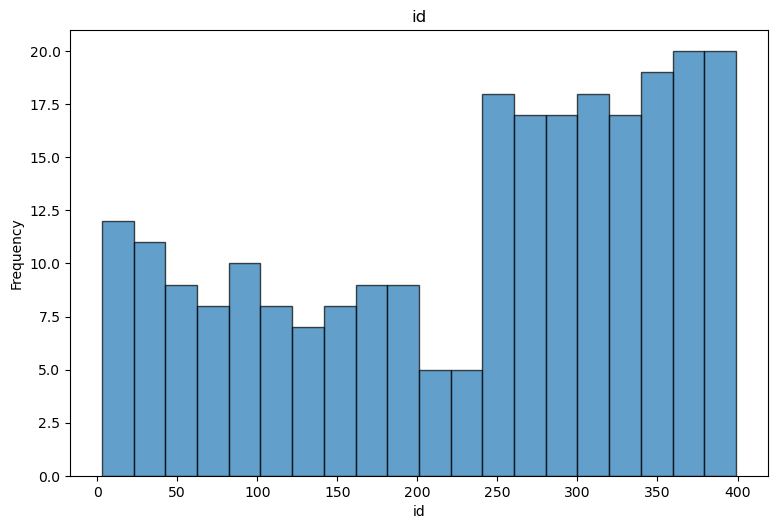

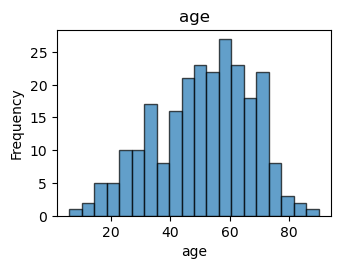

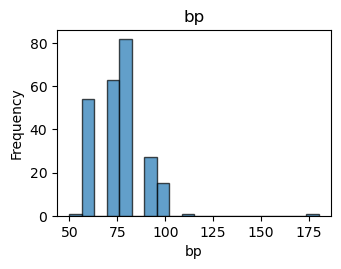

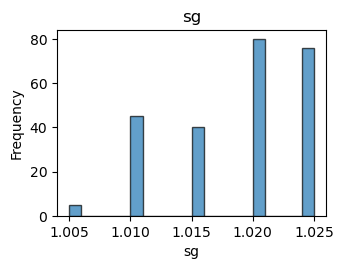

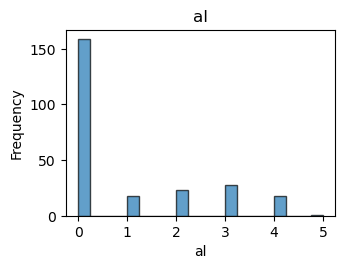

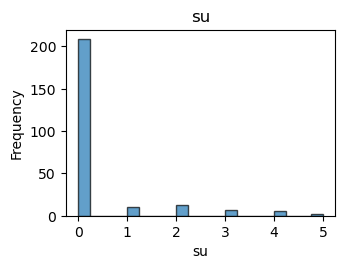

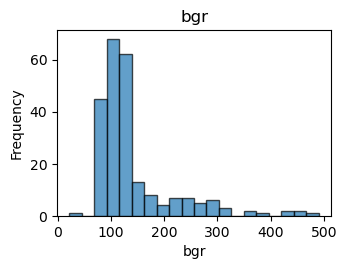

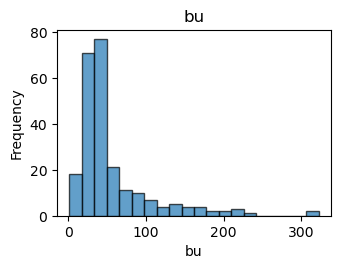

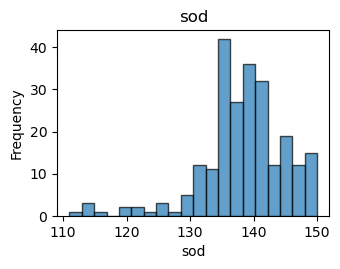

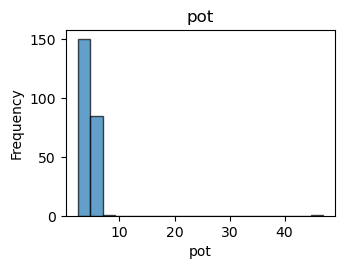

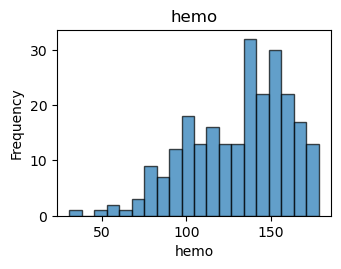

In [857]:
import matplotlib.pyplot as plt
import math


def plot_data(df):
    plt.figure(figsize=(15, 10))
    numeric_cols= df.select_dtypes(include=['int', 'float']).columns   # Select numerical columns


    for i, col in enumerate(numeric_cols, start=1):  # Loopataan numerillisten columnejen läpi
        plt.subplot(2, 2, 1)  # Tehää 3x3
        df[col].plot(kind='hist', title=col, bins=20, edgecolor="black", alpha=0.7) # Adds bins and edges
        plt.xlabel(col)  # Label x axis
        plt.ylabel('Frequency')

        plt.tight_layout() # Prevent overlapping
        plt.show()

plot_data(df_filtered)  # Calling the function on my cleaned dataset


Finally, calculate the correlation matrix and visualize it for each data frame. Clearly describe the results and your interpretation for it.

As the ID variable is a unique identifier for each individual, it does not make sense to include it in the correlation matrix. We temporarily drop the variable from the data frame for the calculation:

In [858]:
corr = df.select_dtypes(include=['number']).corr()
corr

,id,age,bp,sg,al,su,bgr,bu,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,-0.323054,0.357049,-0.610360
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,1.000000,0.097887,0.365183
pot,-0.092347,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.097887,1.000000,-0.133746


Now lets visualize the correlation matrix with a heatmap:

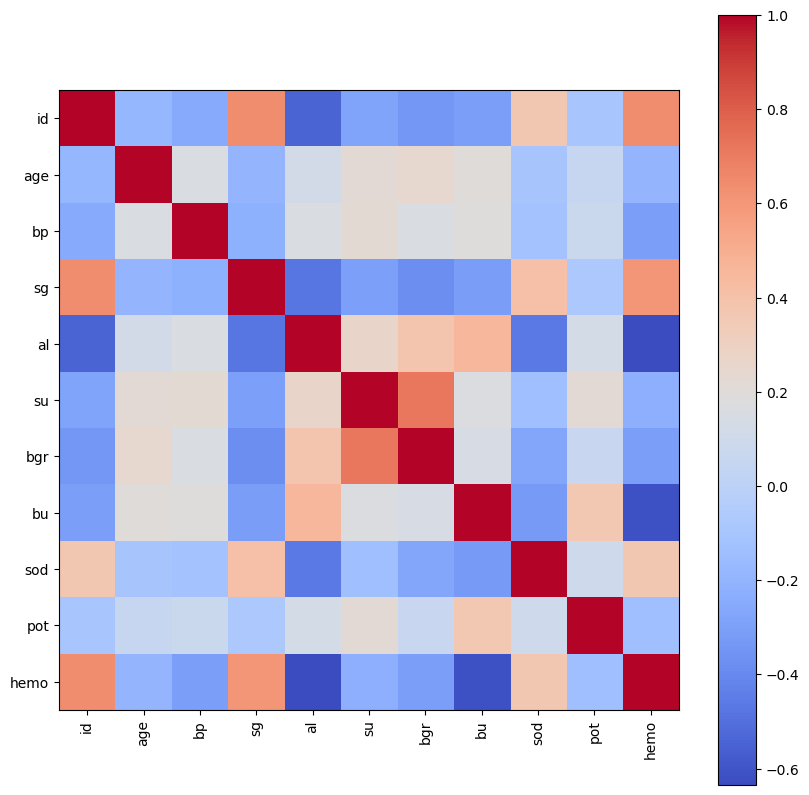

In [859]:
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

sugar and blood glugoce random are positively correlated. The higher the sugar, the higher the sgr seems to be.
hemo and sg are positively correlated. The higher hemo, the higher sg seems to be.
The lower bu is, the higher hemoglobin tends to be.